<h2>"Training Neural Network: Batch Normalisation"</h2>

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline



In [6]:
#read all the words 
words = open('names.txt', 'r').read().splitlines()
print(words[:8])
#total words length 
len(words)

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']


32033

In [7]:
# build the vocabulary of characters and mappings to/from integers
#Use dictionary 
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [33]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:
  
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
... ---> a
..a ---> v
.av ---> a
ava ---> .
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [64]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [34]:
X = torch.tensor(X)
Y = torch.tensor(Y)

In [35]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [36]:
# X is a matrix of block...
# for example 
# . =>0
# e => 5
# m =>13
#... => 0,0,0
#..e => 0,0,5
X


tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [37]:
# Y is the outcome after the end of one context block
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [38]:
# C is the 27*2 order matrix of random distribution
C = torch.randn(27,2)

In [39]:
#our neural network consists of three layers as was given by the paper called 

#given by our embeddings: for 27 characters our input will be 27 and we choose 2 dimensioned vector [C] and 3 neural networks 
#hidden layers (given by W1)
#outer layer

In [40]:
#emb stands for embeddings
emb = C[X]
emb.shape
# which is the random distribution of all the elements present in tensor X.
# it is like index position of list giving the elements in that list
# so embeddings give all the random distribution of elements in  tensor X


#now the reason behind indexing X in C is :
# X is our input 
# C is the probability distribution
# when we index C into X it will give us the probability distribution for our input

# for example 
'''
for ..e X will be 005
005(order: 1*3) tensor then multiplies with C (order: 27*2)
005 000 000 000 000 000 .....000 multiplies with C
produces an resultant matrix of size 1*3*2 
#this gives the meaning each element is embedded with two distribution



'''


'\nfor ..e X will be 005\n005(order: 1*3) tensor then multiplies with C (order: 27*2)\n005 000 000 000 000 000 .....000 multiplies with C\nproduces an resultant matrix of size 1*3*2 \n#this gives the meaning each element is embedded with two distribution\n\n\n\n'

In [41]:
# lets talk about the size of the embeddings

# lets say the size of tensor X is 16 * 3 
#every 16*3 element has two normal distribution.Hence one dimension is added in the embeddings


In [42]:
W1 = torch.randn((6, 100)) #W1 is our hidden layer
b1 = torch.randn(100)
W1.shape

torch.Size([6, 100])

In [43]:
# What a neural network is 
'''
X@W+b  or 
in present case : emb @ W1 +b1

but we cannot do emb@W +b just yet
because emb dimension is 48*2
and W1 dimension is 6*100

Now lets analyze why emb is 48*2
We have our input size 16*2
32 * 2 @3 we multiply our inputs with 3 because there are 3 neurons 
 


'''

emb@W1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [ ]:
#Some functions such as concatenate, unbind helps to multiply two matrixes of different size
#Concatenate

#We can solve above issue using concatenate 


#Concatenates the given sequence of seq tensors in the given dimension. All tensors must have the same shape
#(except in the concatenating dimension) or be empty.
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]],1)

#but still this is inefficient as we have to manually index 



# Torch has another function called unbind

In [44]:
#unbind: removes a tensor dimension & returns a tuple of all slices along a given dimension, already without it
torch.cat(torch.unbind(emb,1),1)

#concatenation  creates a whole new tensor which is a wastage of storage.
torch.unbind(emb,1) #gives tuple of emb with same size as returned by [emb[:,0,:], emb[:,1,:], emb[:,2,:]]

(tensor([[ 0.6720,  0.9614],
         [ 0.6720,  0.9614],
         [ 0.6720,  0.9614],
         [ 1.7417, -1.9369],
         [ 0.6285, -0.2257],
         [ 0.6720,  0.9614],
         [ 0.6720,  0.9614],
         [ 0.6720,  0.9614],
         [-0.7058,  1.5743],
         [-1.0433, -0.6958],
         [ 1.1019,  0.9770],
         [-1.1385,  1.5127],
         [ 0.6720,  0.9614],
         [ 0.6720,  0.9614],
         [ 0.6720,  0.9614],
         [ 0.0265, -0.0144],
         [ 0.6720,  0.9614],
         [ 0.6720,  0.9614],
         [ 0.6720,  0.9614],
         [ 1.1019,  0.9770],
         [-0.7816,  0.7506],
         [ 0.0265, -0.0144],
         [ 0.7222, -0.1749],
         [ 1.7417, -1.9369],
         [-1.0433, -0.6958],
         [ 0.6720,  0.9614],
         [ 0.6720,  0.9614],
         [ 0.6720,  0.9614],
         [-0.7816,  0.7506],
         [-0.7058,  1.5743],
         [-0.0443, -1.5355],
         [-0.8337,  0.0471]]),
 tensor([[ 0.6720,  0.9614],
         [ 0.6720,  0.9614],
         [ 1

In [45]:
torch.concat(torch.unbind(emb,1),1)

tensor([[ 0.6720,  0.9614,  0.6720,  0.9614,  0.6720,  0.9614],
        [ 0.6720,  0.9614,  0.6720,  0.9614,  1.7417, -1.9369],
        [ 0.6720,  0.9614,  1.7417, -1.9369,  0.6285, -0.2257],
        [ 1.7417, -1.9369,  0.6285, -0.2257,  0.6285, -0.2257],
        [ 0.6285, -0.2257,  0.6285, -0.2257,  0.0265, -0.0144],
        [ 0.6720,  0.9614,  0.6720,  0.9614,  0.6720,  0.9614],
        [ 0.6720,  0.9614,  0.6720,  0.9614, -0.7058,  1.5743],
        [ 0.6720,  0.9614, -0.7058,  1.5743, -1.0433, -0.6958],
        [-0.7058,  1.5743, -1.0433, -0.6958,  1.1019,  0.9770],
        [-1.0433, -0.6958,  1.1019,  0.9770, -1.1385,  1.5127],
        [ 1.1019,  0.9770, -1.1385,  1.5127,  1.1019,  0.9770],
        [-1.1385,  1.5127,  1.1019,  0.9770,  0.0265, -0.0144],
        [ 0.6720,  0.9614,  0.6720,  0.9614,  0.6720,  0.9614],
        [ 0.6720,  0.9614,  0.6720,  0.9614,  0.0265, -0.0144],
        [ 0.6720,  0.9614,  0.0265, -0.0144, -1.1385,  1.5127],
        [ 0.0265, -0.0144, -1.1385,  1.5

In [46]:
torch.concat(torch.unbind(emb,1),1).shape

torch.Size([32, 6])

In [47]:
emb.shape

#unbind mashed up 3*2 into 6 . 
#unbind and concated took 32*3*2 order emb and returned 32*6 matrix

# we do this because our hidden layer size is 6*100
# our hidden layer size is 6*100 because, we have 3 neurons with 2 dimension at our first layer

torch.Size([32, 3, 2])

In [48]:
#we can also use another function of pytorch. And this will be used at production level as well
#more significant and better way
#View function

#note: A view function can be used to rearrange the matrix element in any size in the way we want
#very important

In [25]:
# A tensor from 0 to 17
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [26]:
a.shape

torch.Size([18])

In [28]:
a.view(2,9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [29]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [30]:
#this is how computer mememory stores every tensor. (as one dimension)
#so we can manipulate dimension of matrices of the tensor using view function
# it doesn't need any extra memory 
#ultra efficient function

a.storage()

/var/folders/y0/gqnwmd7j4j76t0rjlvwt9yx80000gn/T/ipykernel_90873/428587008.py:6: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [31]:
emb.shape

torch.Size([16, 3, 2])

In [ ]:
#hint : matrices and tensors are same thing : dont get confused

In [49]:
#true means that all the states of the tensors are same
emb.view(32,6) == torch.cat(torch.unbind(emb,1),1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

<h2>Hidden Layer</h2>

In [50]:
# now the formula of the neural network
# XW+ b (input * weight + bias)
# also given by emb @ W + b
# 'h' is the hidden state we are after

# now the error in line 76 can be managed with view by
#h= emb.view(32,6) @ W1 +b1
#alternatively we can write above code like below
#h =emb.view(shape[0],6)@ W1 +b1 or,
h =emb.view(-1,6)@ W1 +b1  #here pytorch will infer what "-1" should be. bcoz number of elements must be the -
#same and we have entered 6 (columns) already. pytorch will derive "-1" (rows) to be 32



In [51]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [52]:
h

tensor([[ 0.3714,  0.9984, -0.9600,  ..., -0.9975, -0.7836, -0.9675],
        [ 0.9964,  1.0000, -0.9984,  ..., -0.9972, -0.9696,  0.6746],
        [ 0.6612, -1.0000,  0.4667,  ..., -0.9955, -0.9997,  0.9976],
        ...,
        [-0.9979, -1.0000,  0.9967,  ..., -0.9834, -0.9837,  0.9998],
        [ 0.0077,  0.9994,  0.0689,  ...,  0.9874,  0.9733, -1.0000],
        [-0.6646,  0.9729,  0.2022,  ..., -0.9818,  0.8181, -0.9968]])

In [53]:
h.shape

torch.Size([32, 100])

In [54]:
#consturcting another layer
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [55]:
logits = h @ W2 + b2 #h is an input to the second layer . assgining weights and adding biasness


In [56]:
logits.shape

torch.Size([32, 27])

In [57]:
counts = logits.exp()
#The exponential function exp() is often used in machine learning to ensure that all the outputs are positive and to exaggerate 
# the differences between values.

In [58]:
prob = counts / counts.sum(1, keepdims=True)

In [59]:
prob.shape

torch.Size([32, 27])

In [65]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(18.0450)

In [62]:
# ------------ now made respectable :) ---------------

In [66]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [67]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [68]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [69]:
for p in parameters:
  p.requires_grad = True

In [70]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [71]:
lri = []
lossi = []
stepi = []

In [72]:
for i in range(200000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

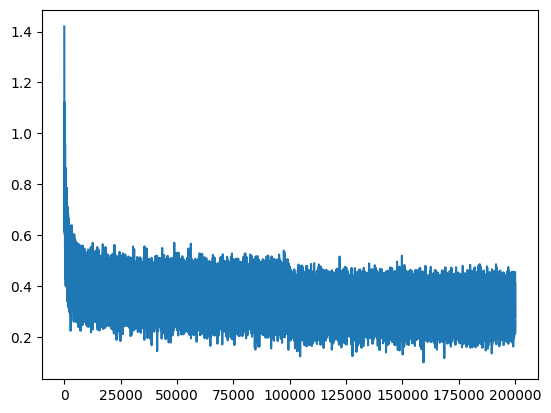

In [74]:
plt.plot(stepi, lossi)

In [75]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1306, grad_fn=<NllLossBackward0>)

In [76]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1764, grad_fn=<NllLossBackward0>)

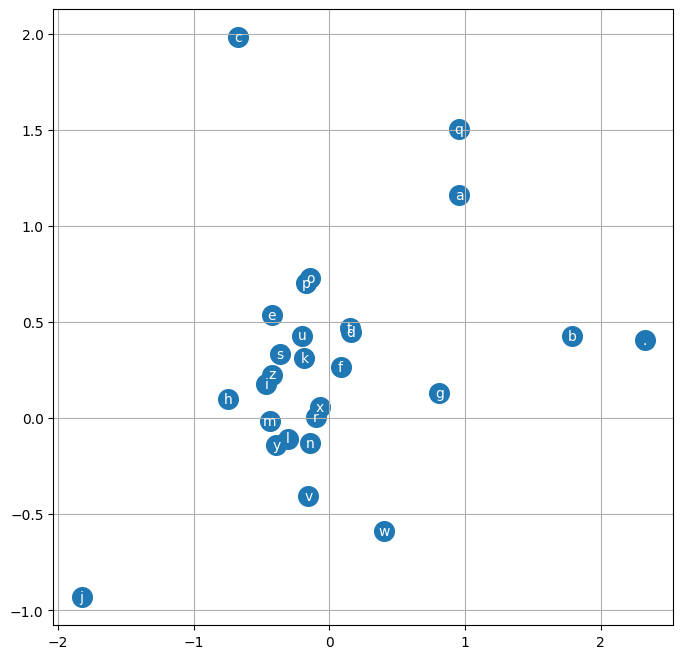

In [77]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [78]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

In [79]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [80]:


# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carmah.
amelle.
khirmiliathilah.
cassie.
mahien.
delynn.
jareei.
nellara.
chaiir.
kaleigh.
ham.
join.
quinn.
sulin.
alian.
quin.
elo.
dearyxix.
kaek.
dus.
